# Wholesale Customers Analysis using pyspark

### Data Source
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

### Data Dictionary

Description of variables is as follows:

1)  FRESH: annual spending (m.u.) on fresh products (Continuous);

2)  MILK: annual spending (m.u.) on milk products (Continuous);

3)  GROCERY: annual spending (m.u.)on grocery products (Continuous);

4)  FROZEN: annual spending (m.u.)on frozen products (Continuous)

5)  DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6)  DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7)  CHANNEL: customers Channel - **Horeca** (Hotel/Restaurant/Cafe) or **Retail** channel (Nominal)

8)  REGION: customers Region **Lisbon**, **Oporto** or **Other** (Nominal)

### Import Libraries

In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import matplotlib.pyplot as plt
import pandas 
%matplotlib inline

### Q1. Read the csv file as a dataframe. And, not as RDD. See the schema of the DF.

In [2]:
ss = SparkSession.builder.appName('Wholesale_Customers').config(conf = SparkConf()).getOrCreate()

In [3]:
df = ss.read.csv('Wholesale customers data.csv', header=True, inferSchema=True, nanValue='N/A', mode='DROPMALFORMED')
type(df)

pyspark.sql.dataframe.DataFrame

In [4]:
#To view the schema of the dataframe
df.printSchema()

root
 |-- Channel: integer (nullable = true)
 |-- Region: integer (nullable = true)
 |-- Fresh: integer (nullable = true)
 |-- Milk: integer (nullable = true)
 |-- Grocery: integer (nullable = true)
 |-- Frozen: integer (nullable = true)
 |-- Detergents_Paper: integer (nullable = true)
 |-- Delicassen: integer (nullable = true)



In [5]:
df.show()

+-------+------+-----+-----+-------+------+----------------+----------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+-----+-------+------+----------------+----------+
|      2|     3|12669| 9656|   7561|   214|            2674|      1338|
|      2|     3| 7057| 9810|   9568|  1762|            3293|      1776|
|      2|     3| 6353| 8808|   7684|  2405|            3516|      7844|
|      1|     3|13265| 1196|   4221|  6404|             507|      1788|
|      2|     3|22615| 5410|   7198|  3915|            1777|      5185|
|      2|     3| 9413| 8259|   5126|   666|            1795|      1451|
|      2|     3|12126| 3199|   6975|   480|            3140|       545|
|      2|     3| 7579| 4956|   9426|  1669|            3321|      2566|
|      1|     3| 5963| 3648|   6192|   425|            1716|       750|
|      2|     3| 6006|11093|  18881|  1159|            7425|      2098|
|      2|     3| 3366| 5403|  12974|  4400|            5977|    

In [6]:
df.dropDuplicates().show()

+-------+------+-----+-----+-------+------+----------------+----------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+-----+-------+------+----------------+----------+
|      1|     3|11243| 2408|   2593| 15348|             108|      1886|
|      2|     3|  260| 8675|  13430|  1116|            7015|       323|
|      1|     3|  327|  918|   4710|    74|             334|        11|
|      1|     3|34454| 7435|   8469|  2540|            1711|      2893|
|      2|     3| 9198|27472|  32034|  3232|           18906|      5130|
|      1|     1|13569|  346|    489|  2077|              44|       659|
|      1|     3| 6990| 3880|   5380|  1647|             319|      1160|
|      2|     2| 2886| 5302|   9785|   364|            6236|       555|
|      2|     3| 2771| 6939|  15541|  2693|            6600|      1115|
|      1|     1| 4042| 2204|   1563|  2286|             263|       689|
|      1|     3| 2121| 1601|   2453|   560|             179|    

In [7]:
# Drop null rows if any and count the total number of rows in output DataFrame
df.dropna().count()

440

In [8]:
df.head(5)

[Row(Channel=2, Region=3, Fresh=12669, Milk=9656, Grocery=7561, Frozen=214, Detergents_Paper=2674, Delicassen=1338),
 Row(Channel=2, Region=3, Fresh=7057, Milk=9810, Grocery=9568, Frozen=1762, Detergents_Paper=3293, Delicassen=1776),
 Row(Channel=2, Region=3, Fresh=6353, Milk=8808, Grocery=7684, Frozen=2405, Detergents_Paper=3516, Delicassen=7844),
 Row(Channel=1, Region=3, Fresh=13265, Milk=1196, Grocery=4221, Frozen=6404, Detergents_Paper=507, Delicassen=1788),
 Row(Channel=2, Region=3, Fresh=22615, Milk=5410, Grocery=7198, Frozen=3915, Detergents_Paper=1777, Delicassen=5185)]

In [9]:
df.show(5, truncate=True)

+-------+------+-----+----+-------+------+----------------+----------+
|Channel|Region|Fresh|Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+----+-------+------+----------------+----------+
|      2|     3|12669|9656|   7561|   214|            2674|      1338|
|      2|     3| 7057|9810|   9568|  1762|            3293|      1776|
|      2|     3| 6353|8808|   7684|  2405|            3516|      7844|
|      1|     3|13265|1196|   4221|  6404|             507|      1788|
|      2|     3|22615|5410|   7198|  3915|            1777|      5185|
+-------+------+-----+----+-------+------+----------------+----------+
only showing top 5 rows



In [10]:
#No. of rows in the dataframe
df.count()

440

In [11]:
#No. of columns in the dataframe
print(len(df.columns))
df.columns

8


['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

### Q2. Use select to view a single column or a set of chosen columns.

In [12]:
df.select('Milk').show()

+-----+
| Milk|
+-----+
| 9656|
| 9810|
| 8808|
| 1196|
| 5410|
| 8259|
| 3199|
| 4956|
| 3648|
|11093|
| 5403|
| 1124|
|12319|
| 6208|
| 9465|
| 1114|
| 8816|
| 6157|
| 6327|
| 2495|
+-----+
only showing top 20 rows



In [13]:
df.select(['Fresh', 'Frozen', 'Delicassen']).show()

+-----+------+----------+
|Fresh|Frozen|Delicassen|
+-----+------+----------+
|12669|   214|      1338|
| 7057|  1762|      1776|
| 6353|  2405|      7844|
|13265|  6404|      1788|
|22615|  3915|      5185|
| 9413|   666|      1451|
|12126|   480|       545|
| 7579|  1669|      2566|
| 5963|   425|       750|
| 6006|  1159|      2098|
| 3366|  4400|      1744|
|13146|  1420|       497|
|31714|   287|      2931|
|21217|  3095|       602|
|24653|   294|      2168|
|10253|   397|       412|
| 1020|   134|      1080|
| 5876|   839|      4478|
|18601|  2205|      3181|
| 7780|   669|       501|
+-----+------+----------+
only showing top 20 rows



### Q3. Use filter to see records with fresh sales more than 50000 only.

In [14]:
df.filter(df['Fresh']>50000).show()

+-------+------+------+-----+-------+------+----------------+----------+
|Channel|Region| Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+------+-----+-------+------+----------------+----------+
|      1|     3| 56159|  555|    902| 10002|             212|      2916|
|      1|     3| 56082| 3504|   8906| 18028|            1480|      2498|
|      1|     3| 76237| 3473|   7102| 16538|             778|       918|
|      1|     3|112151|29627|  18148| 16745|            4948|      8550|
|      1|     1| 56083| 4563|   2124|  6422|             730|      3321|
|      1|     1| 53205| 4959|   7336|  3012|             967|       818|
|      1|     3| 68951| 4411|  12609|  8692|             751|      2406|
+-------+------+------+-----+-------+------+----------------+----------+



In [15]:
df.select('Channel').distinct().show()

+-------+
|Channel|
+-------+
|      1|
|      2|
+-------+



In [16]:
df.select('Region').distinct().show()

+------+
|Region|
+------+
|     1|
|     3|
|     2|
+------+



In [17]:
df.crosstab('Channel', 'Region').show()

+--------------+---+---+---+
|Channel_Region|  1|  2|  3|
+--------------+---+---+---+
|             2| 18| 19|105|
|             1| 59| 28|211|
+--------------+---+---+---+



### Q4. Create aggregates on channels and regions variables.

In [18]:
########### aggregates (SUM(), AVG(), MIN(), MAX(), COUNT()) ##############

#Convert the dataframe to SparkSQL table
df.createOrReplaceTempView("sqlDF")
temp = ss.sql("SELECT * FROM sqlDF")
#temp.show()

#Create aggregates(Ex: Total-sales using SUM()) on 'Channel' variable
temp1 = ss.sql("SELECT Channel, SUM(Fresh) as Tot_Fresh_Sales, SUM(Milk) as Tot_Milk_Sales, SUM(Grocery) as Tot_Grocery_Sales, SUM(Frozen) as Tot_Frozen_Sales, SUM(Detergents_Paper) as Tot_Det_Paper_Sales, SUM(Delicassen) as Tot_Deli_Sales FROM sqlDF GROUP BY Channel ORDER BY Channel")

print(type(temp1))
temp1.show()

<class 'pyspark.sql.dataframe.DataFrame'>
+-------+---------------+--------------+-----------------+----------------+-------------------+--------------+
|Channel|Tot_Fresh_Sales|Tot_Milk_Sales|Tot_Grocery_Sales|Tot_Frozen_Sales|Tot_Det_Paper_Sales|Tot_Deli_Sales|
+-------+---------------+--------------+-----------------+----------------+-------------------+--------------+
|      1|        4015717|       1028614|          1180717|         1116979|             235587|        421955|
|      2|        1264414|       1521743|          2317845|          234671|            1032270|        248988|
+-------+---------------+--------------+-----------------+----------------+-------------------+--------------+



In [19]:
#Create aggregates(Ex: Total-sales using SUM()) on 'Region' variable
temp2 = ss.sql("SELECT Region, SUM(Fresh) as Tot_Fresh_Sales, SUM(Milk) as Tot_Milk_Sales, SUM(Grocery) as Tot_Grocery_Sales, SUM(Frozen) as Tot_Frozen_Sales, SUM(Detergents_Paper) as Tot_Det_Paper_Sales, SUM(Delicassen) as Tot_Deli_Sales FROM sqlDF GROUP BY Region ORDER BY Region")

print(type(temp2))
temp2.show()

<class 'pyspark.sql.dataframe.DataFrame'>
+------+---------------+--------------+-----------------+----------------+-------------------+--------------+
|Region|Tot_Fresh_Sales|Tot_Milk_Sales|Tot_Grocery_Sales|Tot_Frozen_Sales|Tot_Det_Paper_Sales|Tot_Deli_Sales|
+------+---------------+--------------+-----------------+----------------+-------------------+--------------+
|     1|         854833|        422454|           570037|          231026|             204136|        104327|
|     2|         464721|        239144|           433274|          190132|             173311|         54506|
|     3|        3960577|       1888759|          2495251|          930492|             890410|        512110|
+------+---------------+--------------+-----------------+----------------+-------------------+--------------+



### Q5. Use describe to see summary statistics on dataframe.

In [20]:
df.describe(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']).show()

+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+
|summary|             Fresh|              Milk|          Grocery|           Frozen|  Detergents_Paper|        Delicassen|
+-------+------------------+------------------+-----------------+-----------------+------------------+------------------+
|  count|               440|               440|              440|              440|               440|               440|
|   mean|12000.297727272728| 5796.265909090909|7951.277272727273|3071.931818181818|2881.4931818181817|1524.8704545454545|
| stddev|12647.328865076885|7380.3771745708445|9503.162828994346|4854.673332592367| 4767.854447904201|2820.1059373693965|
|    min|                 3|                55|                3|               25|                 3|                 3|
|    max|            112151|             73498|            92780|            60869|             40827|             47943|
+-------+---------------

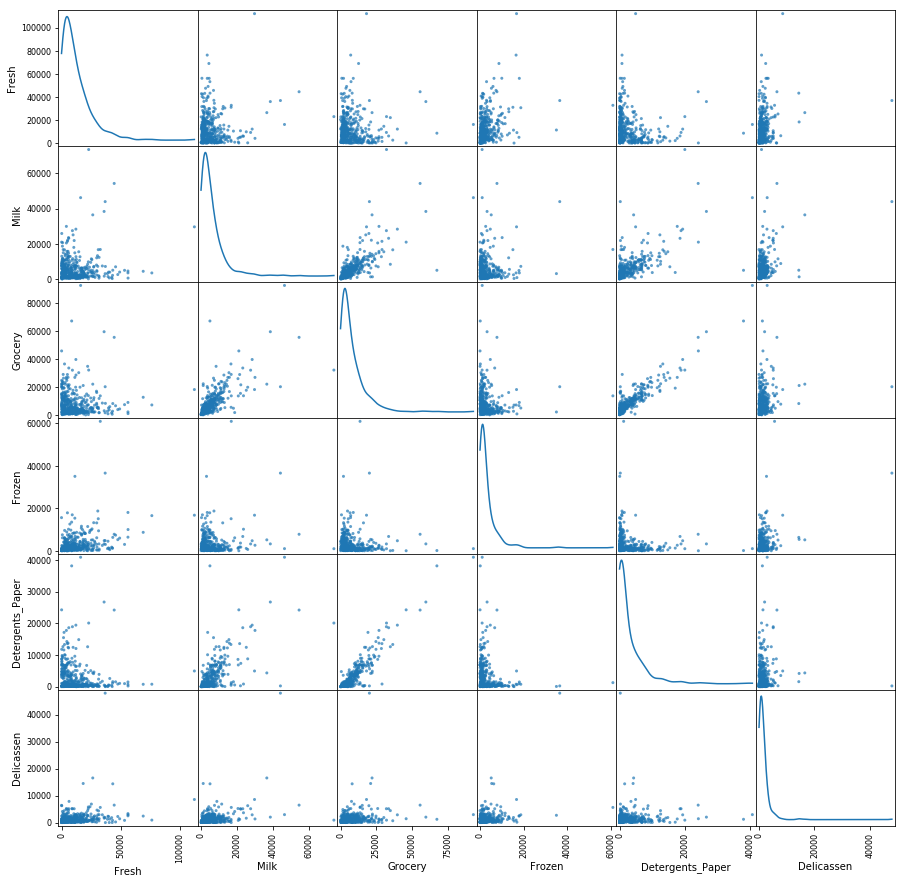

In [21]:
# convert spark df to pandas df and plot
pdf = df.toPandas()
#pdf.head()
pdf = pdf.drop(['Channel', 'Region'], axis=1)

from pandas.plotting import scatter_matrix

temp = scatter_matrix(pdf, alpha=0.7, figsize=(15, 15), diagonal='kde')

### Q6. Change datatype of 'Channel' to Strings

In [22]:
df.dtypes

[('Channel', 'int'),
 ('Region', 'int'),
 ('Fresh', 'int'),
 ('Milk', 'int'),
 ('Grocery', 'int'),
 ('Frozen', 'int'),
 ('Detergents_Paper', 'int'),
 ('Delicassen', 'int')]

In [23]:
from pyspark.sql.types import StringType

df=df.withColumn('Channel', df['Channel'].cast(StringType()))
df.dtypes

[('Channel', 'string'),
 ('Region', 'int'),
 ('Fresh', 'int'),
 ('Milk', 'int'),
 ('Grocery', 'int'),
 ('Frozen', 'int'),
 ('Detergents_Paper', 'int'),
 ('Delicassen', 'int')]

In [24]:
channel_dict = {'1':'Horeca', '2':'Retail'} # 'Horeca' (Hotel/Restaurant/Cafe) or 'Retail' channel
df.na.replace(channel_dict, 1).show()

+-------+------+-----+-----+-------+------+----------------+----------+
|Channel|Region|Fresh| Milk|Grocery|Frozen|Detergents_Paper|Delicassen|
+-------+------+-----+-----+-------+------+----------------+----------+
| Retail|     3|12669| 9656|   7561|   214|            2674|      1338|
| Retail|     3| 7057| 9810|   9568|  1762|            3293|      1776|
| Retail|     3| 6353| 8808|   7684|  2405|            3516|      7844|
| Horeca|     3|13265| 1196|   4221|  6404|             507|      1788|
| Retail|     3|22615| 5410|   7198|  3915|            1777|      5185|
| Retail|     3| 9413| 8259|   5126|   666|            1795|      1451|
| Retail|     3|12126| 3199|   6975|   480|            3140|       545|
| Retail|     3| 7579| 4956|   9426|  1669|            3321|      2566|
| Horeca|     3| 5963| 3648|   6192|   425|            1716|       750|
| Retail|     3| 6006|11093|  18881|  1159|            7425|      2098|
| Retail|     3| 3366| 5403|  12974|  4400|            5977|    

/opt/cloudera/parcels/SPARK2/lib/spark2/python/pyspark/sql/dataframe.py:1431: UserWarning: to_replace is a dict and value is not None. value will be ignored.
  warnings.warn("to_replace is a dict and value is not None. value will be ignored.")
